# Статистический анализ данных сервиса аренды самокатов GoFast

**Заголовок:** Статистический анализ данных сервиса аренды самокатов GoFast.

**Описание проекта:**
Сервис аренды самокатов GoFast предлагает пользователям возможность аренды самокатов для передвижения по городу. Сервис предоставляет информацию о доступности самокатов, их местоположении, стоимости аренды и других параметрах. Анализ данных поможет нам выяснить, насколько прибылен или убыточен сервис.

**Цель исследования:**
Целью исследования является анализ данных сервиса GoFast для выявления тенденций и закономерностей в использовании самокатов. Исследование направлено на определение популярности сервиса, времени использования самокатов, проверке гипотез, а также других параметров, которые могут быть полезны для развития сервиса и улучшения качества обслуживания пользователей.

**Ход исследования:**
Исследование включает в себя следующие этапы:

    - Подготовка данных на представленных датасетах (информация о пользователе, его поездках, тип подписки);
    - Исследовательский анализ данных о пользователях, о длине и времени поездке, типе подписки и пр
    - Объединение данных, сделав более подробный датасет о пользователе, а также отдельный датасет о выручке по каждому пользователю по месяцам. 
    - Статистический анализ данных. Проверка гипотез по средней продолжительности поездки пользователя, пройденном расстоянии, помесячной выручки пользователя от типа подписки. 
    - Интерпретация результатов анализа и формулирование выводов.

**Общий вывод:**
С помощью данного исследования мы можем выявить платежоспособную аудиторию, узнать, сколько в среднем выручки нам приносит один пользователь, а также в каком направлении двигаться по улучшению подписочной системы.

Содержание
1. [Загрузка данных](#1) 
2. [Предобработка данных](#2) 
3. [Исследовательский анализ данных](#3) 
4. [Объединение данных](#4) 
5. [Подсчёт выручки](#5) 
6. [Проверка гипотез](#6) 
7. [Вывод исследования](#7) 

<a id="1"></a> 
#### Загрузка данных

In [1]:
from scipy import stats as st
from math import factorial
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Пользователи**

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [3]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

**Поездки**

In [4]:
rides_go = pd.read_csv('/datasets/rides_go.csv')
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

**Подписки**

In [6]:
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [7]:
subscriptions_go.head(2)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

**Вывод:** мы предзагрузили данные, сразу видно, что пропусков нет, настало время их проверить на наличие аномалий и дубликатов.

<a id="2"></a> 
#### Предобработка данных

Для начала изменим тип столбца поездки date на формат Datetime:

In [8]:
rides_go['date'] = pd.to_datetime(
    rides_go['date'], format='%Y-%m-%d')

Перепроверим, за какой период у нас данные о поездках

In [9]:
rides_go['date'].min()

Timestamp('2021-01-01 00:00:00')

In [10]:
rides_go['date'].max()

Timestamp('2021-12-30 00:00:00')

Данные о поездках у нас за весь 2021 год. Данные при анализе по месяцам "не склеются" и будет видно общую картину за год.
Добавим столбец номера месяца для дальнейшего исследования.


In [11]:
rides_go['date_month'] = pd.DatetimeIndex(rides_go['date']).month

Округлим значения расстояния и длительности поездки до 1 знака после запятой.

In [12]:
rides_go['distance'] = rides_go['distance'].round(1)

In [13]:
rides_go['duration'] = rides_go['duration'].round(1)

Проверим на явные дубликаты.

In [14]:
users_go.duplicated().sum()

31

Избавимся от них

In [15]:
users_go = users_go.drop_duplicates()
users_go.duplicated().sum()

0

In [16]:
rides_go.duplicated().sum()

0

Явных дубликатов в данных по поездкам нет.

Проверим на неявные дубликаты

In [17]:
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов нет.

Проверим на аномальные значения столбец пользователей.

In [18]:
users_go.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


Здесь все в порядке. Единственное, что смущает, так это пользователь 12 лет. Но это вопрос к разработчикам - с какого возраста возможна регистрация пользователя.

Проверим на аномальные значения столбец поездок.

In [19]:
rides_go.describe()

,user_id,distance,duration,date_month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659841,17.804920,6.486772
std,434.734317,1116.831106,6.091365,3.437410
min,1.000000,0.900000,0.500000,1.000000
25%,487.000000,2543.200000,13.600000,4.000000
50%,889.000000,3133.600000,17.700000,6.000000
75%,1213.250000,3776.225000,21.700000,9.000000
max,1534.000000,7211.000000,40.800000,12.000000


Странное значение длительности поездок. Выберем несколько строк, длительность аренды которая меньше 2 мин и рассмотрим их

In [20]:
rides_go.query('duration < 2')

,user_id,distance,duration,date,date_month
6531,701,4196.4,0.5,2021-08-31,8
6570,704,4830.8,0.5,2021-10-14,10
6680,712,4684.0,0.5,2021-03-04,3
6695,713,5215.6,0.5,2021-02-25,2
6768,718,5197.4,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.3,0.5,2021-01-19,1
17242,1477,6724.9,0.5,2021-01-12,1
17314,1483,4445.5,0.5,2021-03-06,3
17505,1496,5722.6,0.5,2021-02-14,2


95 значений с слишком низким временем поездки и аномально большим количеством метров, пройденное за короткое время. Удалять их не будем, т.к. за эти поездки оплата была получена и так мы потеряем важные данные. Лучше выяснить проблему у разработчиков.

**Вывод:** мы предобработали данные, избавившись от явных дубликатов, аномальных значений, и добавив таблицу с номером месяца для дальнейшего исследования.

<a id="3"></a> 
#### Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.

Исследуем, насколько часто встречаются города в датасете:

In [21]:
users_city_count = users_go.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count').sort_values(by='user_id',ascending=False)
users_city_count

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Text(0, 0.5, 'Названия городов')

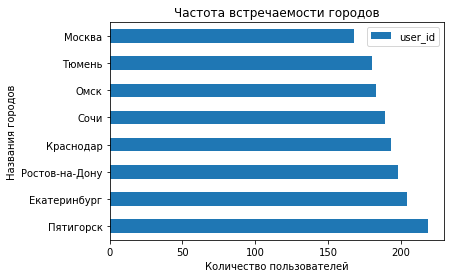

In [22]:
(
    users_city_count
    .plot.barh(title='Частота встречаемости городов') 
)
plt.xlabel('Количество пользователей')
plt.ylabel('Названия городов')

**Вывод:** Имеются данные по 8 городам, где пользуются приложением. Больше всего зарегестрировано пользователей в Пятигорске. Меньше в Москве. 

Text(0, 0.5, '')

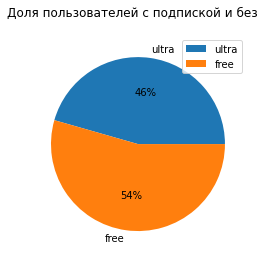

In [23]:
(
    users_go
    .pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
    .sort_values(by='user_id')
    .plot(kind="pie", title='Доля пользователей с подпиской и без', subplots=True, autopct='%1.0f%%')
)
plt.ylabel('')

**Вывод:** Больше всего пользователей с бесплатной подпиской, разница составляет 8%.

Распределение заказов по возрасту пользователей;

<AxesSubplot:xlabel='age'>

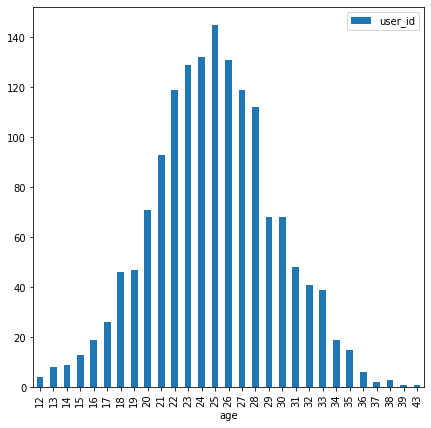

In [24]:
(
    users_go
    .pivot_table(index = 'age', values = 'user_id', aggfunc = 'count')
    .plot(kind='bar', figsize=(7,7))
)

**Вывод:** Больше всего пользователей студентческого возраста от 21 до 28 лет.

Расстояние, которое пользователь преодолел за одну поездку;

<AxesSubplot:ylabel='Frequency'>

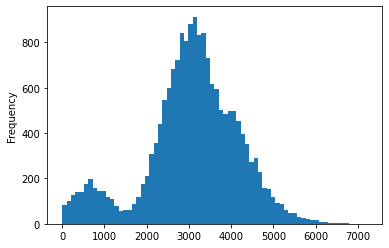

In [25]:
rides_go['distance'].plot(kind="hist", bins=70)

**Вывод:** Имеется 2 пика - на 500 м и на 3 км. Это может быть связано с тем, что для прогулочной поездки одно расстояние, а для поездки на работу - другое.

<AxesSubplot:ylabel='Frequency'>

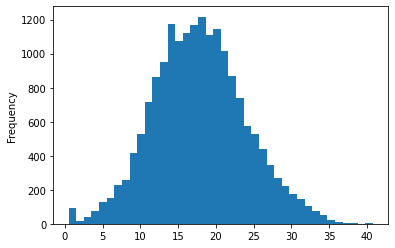

In [26]:
rides_go['duration'].plot(kind="hist", bins=40)

**Вывод:** Среднее время поездки занимает 15-20 минут, что достаточно для того, чтобы добраться на работу или чтобы прогулятся.

<a id="4"></a>
#### Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм.

Для начала выясним, какой у нас размер датасета по количеству поездок.

In [27]:
print("Количество строк данных о поездках пользователей -", len(rides_go))

Количество строк данных о поездках пользователей - 18068


У нас должна получиться новая таблица с 17973 строками. Объединяем данные.

In [28]:
data_go = rides_go.merge(users_go, on = 'user_id').merge(subscriptions_go, on = 'subscription_type')

In [29]:
data_go

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.9,25.6,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.6,15.8,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.2,6.2,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.8,18.5,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.7,26.3,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.1,19.8,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.4,21.4,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.2,18.4,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.3,16.7,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Перепроверим количество строк в новой таблице.

In [30]:
print("Количество строк данных о поездках пользователей -", len(rides_go))
print("Количество строк данных нового датасета о поездках пользователей -", len(data_go))

Количество строк данных о поездках пользователей - 18068
Количество строк данных нового датасета о поездках пользователей - 18068


Проверим на пропуски.

In [31]:
data_go.isna().count()

user_id              18068
distance             18068
duration             18068
date                 18068
date_month           18068
name                 18068
age                  18068
city                 18068
subscription_type    18068
minute_price         18068
start_ride_price     18068
subscription_fee     18068
dtype: int64

Пропусков нет

Создадим датафрейм данных с пользователями с подпиской.

In [32]:
ultra_go = data_go.query('subscription_type == "ultra"')

Также создадим датафрейм данных с пользователями без подписки.

In [33]:
free_go = data_go.query('subscription_type == "free"')

In [34]:
ultra_go

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.9,25.6,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.6,15.8,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.2,6.2,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.8,18.5,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.7,26.3,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.0,24.7,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.7,15.9,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.2,14.4,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.8,15.8,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


In [35]:
free_go

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.7,14.9,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.9,16.2,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.4,20.0,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.9,9.8,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.4,17.4,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.1,19.8,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.4,21.4,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.2,18.4,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.3,16.7,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Объединим  информацию о расстоянии и времени поездок для пользователей обеих категорий.

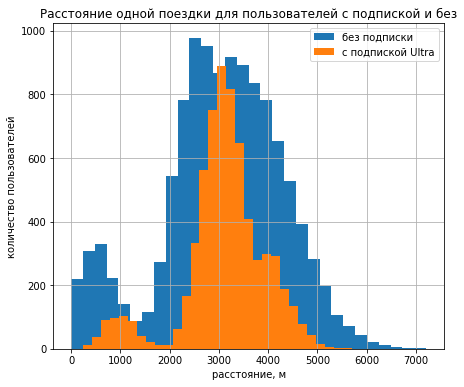

In [36]:
ax = free_go['distance'].plot(kind = 'hist', grid=True, figsize = (7,6), bins = 30, label='без подписки')
ax = ultra_go['distance'].plot(kind = 'hist', grid=True, figsize = (7,6), bins = 30, label='с подпиской Ultra')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

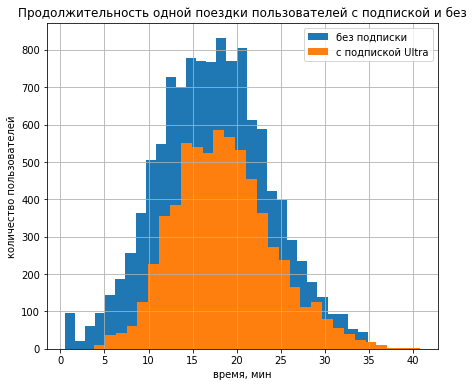

In [37]:
free_go['duration'].plot(kind = 'hist', grid=True, figsize = (7,6), bins = 30, label='без подписки')
ultra_go['duration'].plot(kind = 'hist', grid=True, figsize = (7,6), bins = 30, label='с подпиской Ultra')
plt.title('Продолжительность одной поездки пользователей с подпиской и без')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

**Вывод:**
- Объединили 3 датафрейма в один общий. Создали еще два датафрейма с данными о пользователях с подпиской и без подписки
- На сравнительных графиках видим разницу в расстоянии и времени поездок в двух категориях пользователей. Графики 2х категорий практически не отличаются, отличаются только количеством пользователей и дальностью поездки до 1 км (может быть связано с ограничением на поездку для бесплатных пользователей).

<a id="5"></a> 
#### Подсчёт выручки

Создадим датафрейм с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [38]:
data_agr_go = (data_go
               .pivot_table(index = ['user_id','date_month','subscription_type'], 
                            values = ['distance','duration'], 
                            aggfunc = {'distance':'sum', 'duration':'sum',
                                       'user_id':'count'})
               .rename(columns={'user_id': 'counts'})
               
              )
data_agr_go

distance  duration  counts
user_id date_month subscription_type                            
1       1          ultra                7027.5      41.4       2
        4          ultra                 754.2       6.2       1
        8          ultra                6723.5      44.8       2
        10         ultra                5809.9      31.6       2
        11         ultra                7003.5      53.3       3
...                                        ...       ...     ...
1534    6          free                 3409.4      24.8       2
        8          free                 7622.4      47.2       2
        9          free                 4928.2      22.6       1
        11         free                13350.0      76.3       4
        12         free                 2371.7      15.9       1

[11331 rows x 3 columns]

Посчитаем выручку, которую принес каждый пользователь и добавим в таблицу.

In [39]:
data_agr_go = data_agr_go.reset_index().merge(subscriptions_go, on='subscription_type')

In [40]:
data_agr_go['revenue'] = (
    (data_agr_go['start_ride_price'] * data_agr_go['counts']) 
    + (data_agr_go['minute_price'] * data_agr_go['duration'].apply(np.ceil)) 
    + data_agr_go['subscription_fee']
)
data_agr_go.drop(['minute_price','start_ride_price','subscription_fee'], axis= 1 , inplace= True)

In [41]:
data_agr_go = data_agr_go.set_index(['user_id', 'date_month', 'subscription_type'])

In [42]:
data_agr_go

distance  duration  counts  revenue
user_id date_month subscription_type                                     
1       1          ultra                7027.5      41.4       2    451.0
        4          ultra                 754.2       6.2       1    241.0
        8          ultra                6723.5      44.8       2    469.0
        10         ultra                5809.9      31.6       2    391.0
        11         ultra                7003.5      53.3       3    523.0
...                                        ...       ...     ...      ...
1534    6          free                 3409.4      24.8       2    300.0
        8          free                 7622.4      47.2       2    484.0
        9          free                 4928.2      22.6       1    234.0
        11         free                13350.0      76.3       4    816.0
        12         free                 2371.7      15.9       1    178.0

[11331 rows x 4 columns]

<a id="6"></a> 
#### Проверка гипотез

**6.1 Определим, тратят ли пользователи с подпиской больше времени на поездки?** 

Гипотезы H0 и H1:

    Н0: Средняя продолжительность поездок с подпиской ultra и без free равна
    Н1: Средняя продолжительность поездок с подпиской ultra больше продолжительности поездок без подписок free

In [43]:
# выбранный уровень статистической значимости
alpha = 0.05 

# так как у нас правостороняя альтернативная гипотеза используем параметр 'greater'
results = st.ttest_ind(ultra_go['duration'], free_go['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.3448182372889e-34
Отвергаем нулевую гипотезу


**Вывод:** Мы отвергаем гипотезу о том, что средняя продолжительность поездок с подпиской 'ultra' равна, чем с подпиской 'free'.

Перепроверим вывод:

In [44]:
print('Среднее время поездки пользователей c подпиской:', round(ultra_go['duration'].mean(),2))
print('Среднее время поездки пользователей без подписки:', round(free_go['duration'].mean(),2))

Среднее время поездки пользователей c подпиской: 18.54
Среднее время поездки пользователей без подписки: 17.39


**6.2 Определим, действительно ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

Проверим гипотезы:

    Н0: среднее расстояние поездки пользователи с подпиской меньше или равна 3130 метрам
    Н1: среднее расстояние поездки пользователи с подпиской больше 3130 метров

In [45]:
interested_value = 3130 # Расстояние одной поездки в 3130 метров

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(ultra_go['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195427368335852
Не отвергаем нулевую гипотезу


**Вывод:** Не получилось отвергнуть гипотезу о том, что среднее расстояние поездок с использованием подписки 'ultra' меньше или равно 3130 метров.

Перепроверим вывод:

In [46]:
print('среднее расстояние поездки пользователи с подпиской:', round(ultra_go['distance'].mean(),2))

среднее расстояние поездки пользователи с подпиской: 3115.44


Получается, среднее расстояние поездки близко к среднему, но меньше его.

**6.3 Проверим гипотезу, является ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Проверим гипотезы:

    Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.
    Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.


In [47]:
data_agr_go_ultra = data_agr_go.reset_index()
data_agr_go_ultra = data_agr_go_ultra[data_agr_go_ultra['subscription_type'] == 'ultra']
data_agr_go_free = data_agr_go.reset_index()
data_agr_go_free = data_agr_go_free[data_agr_go_free['subscription_type'] == 'free']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(data_agr_go_ultra['revenue'], data_agr_go_free['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8124385094177887e-35
Отвергаем нулевую гипотезу


**Вывод:** У нас получилось отвергнуть гипотезу о том, что помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.

Перепроверим вывод:

In [48]:
print('Средняя помесячная выручка от пользователи с подпиской:', round(data_agr_go_ultra['revenue'].mean(),2))
print('Средняя помесячная выручка от пользователи без подписки:', round(data_agr_go_free['revenue'].mean(),2))

Средняя помесячная выручка от пользователи с подпиской: 361.2
Средняя помесячная выручка от пользователи без подписки: 325.45


**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

В данном случае правильнее применить тест проверки гипотез о равенстве средних для зависимых (парных) выборок. В метод scipy.stats.ttest_rel() передать два параметра: наборы данных до обновления и после.Будем проверять одностороннюю критерию.
- Н0: Среднее количество обращений в техподдержку не изменилось после обновления сервера.
- Н1: Среднее количество обращений в техподдержку стало меньше после обновления сервера.

<a id="7"></a> 
#### Вывод исследования.

При проведении анализа данных были выявлены следующие результаты:

- Из 8 городов, наибольшее количество пользователей зарегистрировано в Пятигорске, в то время как наименьшее количество пользователей - в Москве.
- Средний возраст пользователей сервиса составляет 24,9 лет.
- Большинство поездок охватывают расстояние, превышающее 3 километра. Наблюдается небольшой пик в районе 600 метров, что, возможно, указывает на поездки пользователей к станциям метро или другим остановкам общественного транспорта.
- Количество пользователей, пользующихся сервисом аренды самокатов без подписки, превышает количество пользователей с подпиской.

В результате проведенного исследования были подтверждены следующие гипотезы:

- С вероятностью 5% время поездок пользователей с подпиской превышает время поездок пользователей без подписки.
- Среднее расстояние поездок пользователей с подпиской составляет менее 3130 метров (оптимальное расстояние с точки зрения износа самоката).
- Помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.

Рекомендации рекламному отделу:
Для увеличения выручки следует продвигать Ультра подписку, возможные предложения:
- Увеличить охват в других городах (например - Санкт-Петербург, Казань и пр.)
- Предложить первому пользователю скидку на подписку за первый месяц, или за первые 1-2 км поездки.